# Projet Outil d'apprentissage artificielle

### Importations des bibliothèques

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
from sklearn import tree
import graphviz
from sklearn.metrics import precision_recall_curve
from scipy.stats import linregress
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


Lecture des données à partir du fichier CSV

In [ ]:
data = pd.read_csv('Healthcare-Diabetes.csv')

In [ ]:
data

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


### Analyse de donnée

In [ ]:
# Aperçu des 5 premières lignes
print(data.head())

# Obtenir des informations sur les colonnes, les types de données, et les valeurs manquantes
print(data.info())

# Statistiques descriptives des données numériques
print(data.describe())


   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pr

In [ ]:
print(data.isnull().sum())

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
data.drop('Id', inplace=True, axis=1) # Supprime la colonne 'Id' du DataFrame

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
data.isnull().sum() # Affiche le nombre total de valeurs manquantes

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


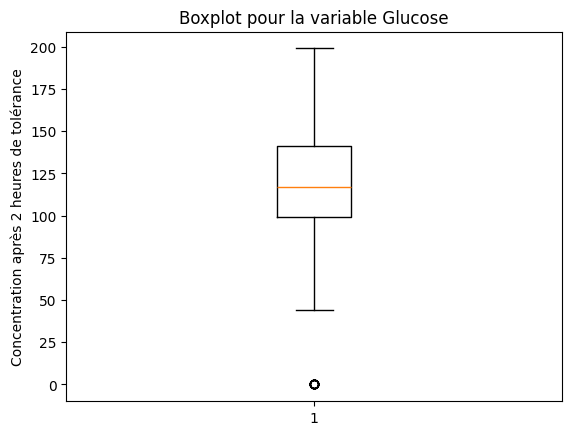

In [ ]:
data_glucose = data.Glucose
# Créer un boxplot
plt.boxplot(data_glucose)

# Ajouter un titre et des étiquettes d'axe
plt.title('Boxplot pour la variable Glucose')
plt.ylabel('Concentration après 2 heures de tolérance')
plt.show()

Ce boxplot représente la distribution des concentrations de glucose 2 heures après un test de tolérance au glucose. On observe une valeur aberrante en dessous du seuil inférieur, indiquée par un cercle.

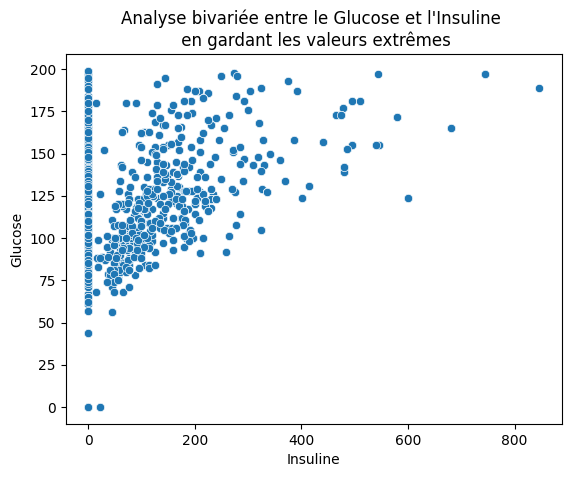

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


In [ ]:
# Crée une copie du DataFrame original pour préserver les données lors de manipulations éventuelles.
df_no_zeros_ins = data

# Génère un nuage de points en utilisant Seaborn, avec 'Insulin' en abscisse et 'Glucose' en ordonnée.
sns.scatterplot(x='Insulin', y='Glucose', data=df_no_zeros_ins)

# Ajoute un titre et des étiquettes aux axes pour mieux interpréter le graphique.
plt.title('Analyse bivariée entre le Glucose et l\'Insuline \n en gardant les valeurs extrêmes')
plt.xlabel('Insuline')
plt.ylabel('Glucose')
plt.show()

# Calcule et affiche la matrice de corrélation pour les colonnes numériques du DataFrame.
df_no_zeros_ins.corr()


Ce nuage de points illustre la relation entre les niveaux de glucose et d'insuline, y compris les valeurs extrêmes. On observe une tendance générale montrant une corrélation positive, bien que certains points se démarquent de cette tendance.

Pente : 0.09226944519936789
Ordonnée à l'origine : 113.70924518477291


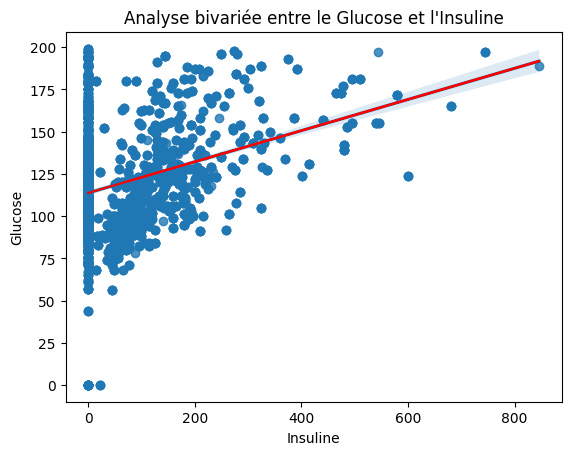

In [ ]:
# Effectue une régression linéaire entre les colonnes 'Insulin' et 'Glucose'.
slope, intercept, r_value, p_value, std_err = linregress(df_no_zeros_ins['Insulin'], df_no_zeros_ins['Glucose'])

# Affiche la pente et l'ordonnée à l'origine de la régression linéaire.
print(f"Pente : {slope}")
print(f"Ordonnée à l'origine : {intercept}")

# Crée un nuage de points avec une ligne de régression générée automatiquement par Seaborn.
sns.regplot(x='Insulin', y='Glucose', data=df_no_zeros_ins)

# Ajoute un titre et des étiquettes aux axes pour le graphique.
plt.title('Analyse bivariée entre le Glucose et l\'Insuline')
plt.xlabel('Insuline')
plt.ylabel('Glucose')

# Trace manuellement la ligne de régression en utilisant la pente et l'ordonnée à l'origine calculées.
plt.plot(df_no_zeros_ins['Insulin'], slope * df_no_zeros_ins['Insulin'] + intercept, color='red')
plt.show()



Ce graphique montre une analyse bivariée entre le glucose et l'insuline avec une droite de régression (en rouge) et son intervalle de confiance. La corrélation positive est mise en évidence, bien que la densité élevée des points à faible insuline reste notable.

(array([634., 467., 345., 206., 145., 190., 169., 141., 128.,  67.,  63.,
         46.,  49.,  33.,  32.,  33.,  12.,   4.,   0.,   4.]),
 array([21., 24., 27., 30., 33., 36., 39., 42., 45., 48., 51., 54., 57.,
        60., 63., 66., 69., 72., 75., 78., 81.]),
 <BarContainer object of 20 artists>)

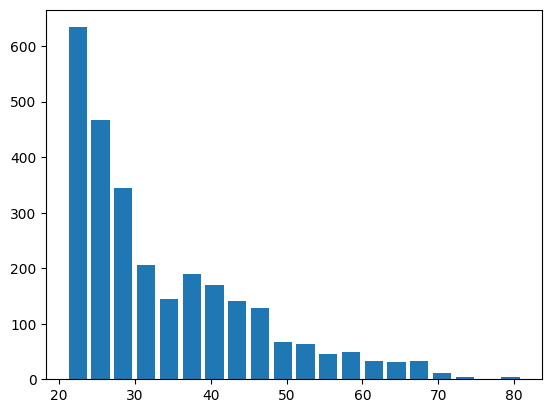

In [ ]:
plt.hist(data["Age"], bins=20, rwidth=0.8)  # Création de l'histogramme

In [ ]:
data['SkinThickness'].corr(data['Outcome']) # Calcule et retourne le coefficient de corrélation de Pearson entre les colonnes 'SkinThickness' et 'Outcome'.

0.07560338491937077

###Matrice de corrélation

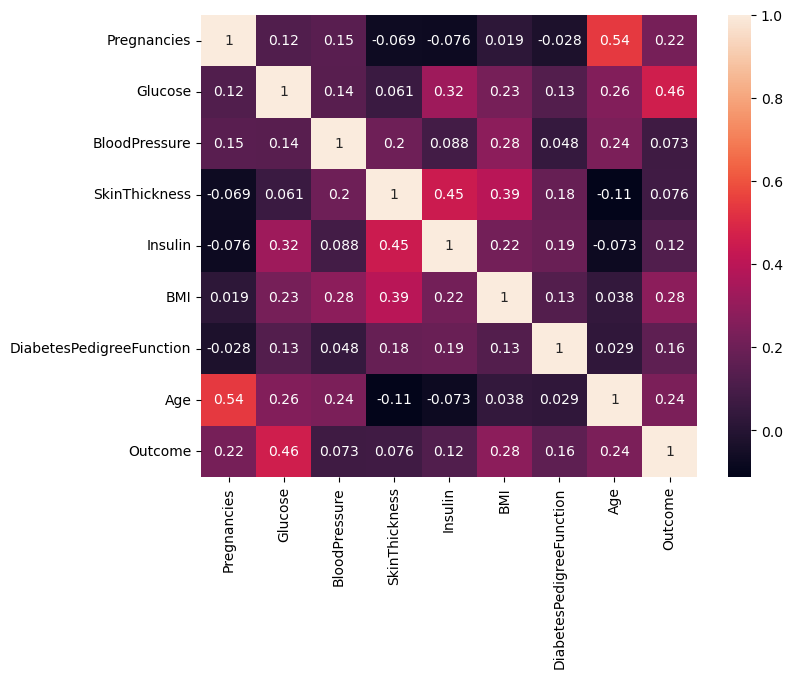

In [ ]:
df_diab = data
corr_df = df_diab.corr(method="pearson")
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

La matrice montre que le glucose est fortement corrélé au résultat (outcome) (0.46), ce qui en fait un facteur clé associé au diabète. Les variables IMC (BMI) et âge ont également une corrélation modérée avec le résultat, indiquant leur rôle potentiel dans le risque de diabète. Enfin, des relations comme celle entre le glucose et l’insuline (0.32) reflètent des mécanismes physiologiques liés à la régulation du sucre dans le sang.

### Séparation des données en features et target

In [ ]:
X = data.drop('Outcome', axis=1) # X contient toutes les colonnes du DataFrame sauf 'Outcome'.
y = data['Outcome']# y contient la colonne 'Outcome', qui représente la variable cible.

Séparation des données en ensembles d'entraînement, de validation et de test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print("Taille de l'ensemble d'entraînement :", len(X_train))
print("Taille de l'ensemble de validation :", len(X_val))
print("Taille de l'ensemble de test :", len(X_test))

Taille de l'ensemble d'entraînement : 1937
Taille de l'ensemble de validation : 415
Taille de l'ensemble de test : 416


### Modele KNN

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
model_knn.fit(X_train, y_train) # Entraînement du modèle KNN sur les données d'entraînement

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = model_knn.predict(X_test)

In [ ]:
precision_score(y_test, y_pred_knn, average='macro')

0.9025974025974026

In [ ]:
matrice_confusion_knn = confusion_matrix(y_test, y_pred_knn)

Visualisation de la matrice de confusion pour le modèle KNN

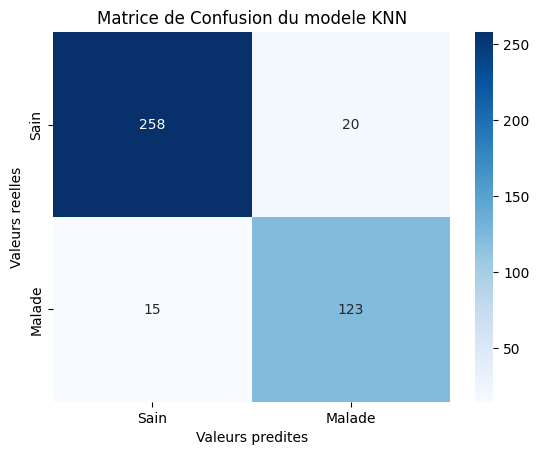

In [ ]:
sns.heatmap(matrice_confusion_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Sain', 'Malade'], yticklabels=['Sain', 'Malade'])
plt.xlabel('Valeurs predites')
plt.ylabel('Valeurs reelles')
plt.title('Matrice de Confusion du modele KNN')
plt.show()

### Modèle Random forest

In [ ]:
model_random_forest = RandomForestClassifier(max_depth=13, random_state=0)

In [ ]:
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, random_state=0)

In [ ]:
y_pred_random_forest = model_random_forest.predict(X_test)

In [ ]:
precision_score(y_test, y_pred_random_forest, average='macro')

0.9786331399097357

In [ ]:
matrice_confusion_random_forest = confusion_matrix(y_test, y_pred_random_forest)

Visualisation de la matrice de confusion pour le modèle Random Forest

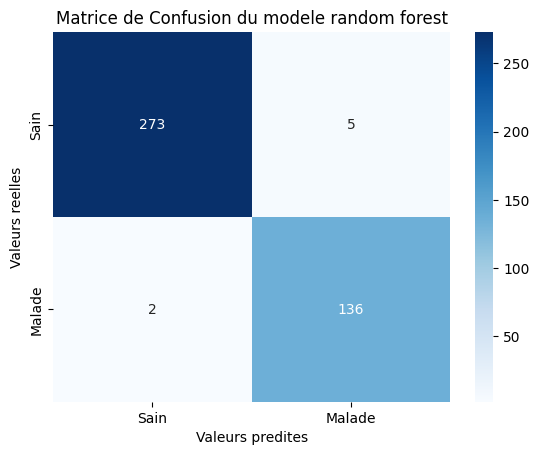

In [ ]:
sns.heatmap(matrice_confusion_random_forest, annot=True, fmt='d', cmap='Blues', xticklabels=['Sain', 'Malade'], yticklabels=['Sain', 'Malade'])
plt.xlabel('Valeurs predites')
plt.ylabel('Valeurs reelles')
plt.title('Matrice de Confusion du modele random forest')
plt.show()

### Modèle Arbre de decision

In [ ]:
model_decision_tree = tree.DecisionTreeClassifier(criterion="entropy") #max_leaf_nodes=30, criterion="entropy"

In [ ]:
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_decision_tree = model_decision_tree.predict(X_test)

In [ ]:
precision_score(y_test, y_pred_decision_tree, average='macro')

0.9786331399097357

In [ ]:
matrice_confusion_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

Visualisation de la matrice de confusion pour le modèle arbre de décision

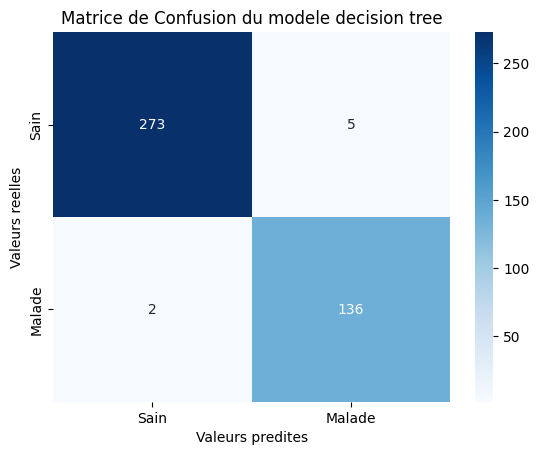

In [ ]:
sns.heatmap(matrice_confusion_decision_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Sain', 'Malade'], yticklabels=['Sain', 'Malade'])
plt.xlabel('Valeurs predites')
plt.ylabel('Valeurs reelles')
plt.title('Matrice de Confusion du modele decision tree')
plt.show()

In [ ]:
# Obtenir les probabilités prédites pour la classe positive (classe 1) par le modèle KNN
y_pred_proba_knn = model_knn.predict_proba(X_test)[:, 1]  # Probabilité de la classe 1

# Calculer la courbe de précision et de rappel pour le modèle KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_proba_knn)

y_pred_proba_tree = model_decision_tree.predict_proba(X_test)[:, 1]  # Pour l'arbre de décision

precision_tree, recall_tree, _ = precision_recall_curve(y_test, y_pred_proba_tree)

y_pred_proba_random = model_random_forest.predict_proba(X_test)[:, 1]  # Pour Random Forest

precision_random, recall_random, _ = precision_recall_curve(y_test, y_pred_proba_random)


### Évaluations

In [ ]:
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_proba_knn)
precision_tree, recall_tree, _ = precision_recall_curve(y_test, y_pred_proba_tree)
precision_random, recall_random, _ = precision_recall_curve(y_test, y_pred_proba_random)

Comparaison des Courbes de Précision-Rappel pour les Modèles KNN, Arbre de Décision et Forêt Aléatoire.

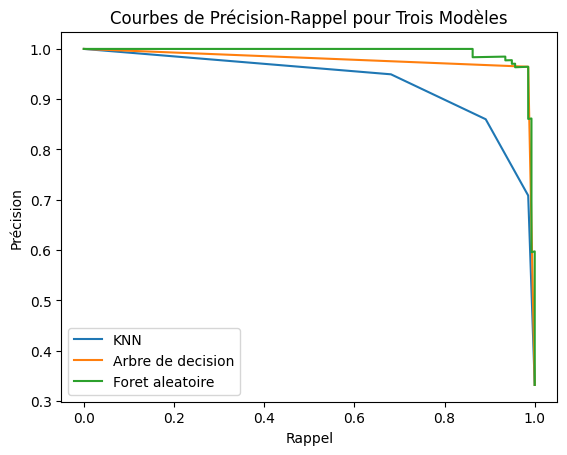

In [ ]:
plt.plot(recall_knn, precision_knn, label='KNN')
plt.plot(recall_tree, precision_tree, label='Arbre de decision')
plt.plot(recall_random, precision_random, label='Foret aleatoire')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes de Précision-Rappel pour Trois Modèles')
plt.legend()
plt.show()

Ce graphe illustre les courbes de précision-rappel pour trois modèles : KNN, arbre de décision et forêt aléatoire. La forêt aléatoire semble avoir une meilleure performance globale, avec une précision élevée pour divers niveaux de rappel. Le modèle KNN montre une chute plus rapide de la précision lorsque le rappel augmente, ce qui le rend moins performant dans ce contexte.

### Validation

In [ ]:
y_pred_val_knn  = model_knn.predict(X_val)
y_pred_val_random = model_random_forest.predict(X_val)
y_pred_val_tree = model_decision_tree.predict(X_val)

In [ ]:
prec_val_knn = precision_score(y_val, y_pred_val_knn, average='macro')
print(f'Precision KNN : {prec_val_knn}')

Precision KNN : 0.8955009905119382


In [ ]:
prec_val_random = precision_score(y_val, y_pred_val_random, average='macro')
print(f'Precision Random forest : {prec_val_random}')

Precision Random forest : 0.9665358563595312


In [ ]:
prec_val_tree = precision_score(y_val, y_pred_val_tree, average='macro')
print(f'Precision decision tree : {prec_val_tree}')

Precision decision tree : 0.9758434547908232


Les résultats de validation montrent que les trois modèles ont des
performances élevées en termes de précision, avec une précision légèrement inférieure pour le KNN (0.8955) par rapport au Random Forest (0.9665) et à l'arbre de décision (0.9758). L'arbre de décision est le modèle le plus performant dans ce contexte.

###Optimisation pour le modèle KNN

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Nombre de voisins
    'weights': ['uniform', 'distance'],  # Poids des voisins
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Métriques de distance
}

model_knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_

###Optimisation pour le modèle Random Forest

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [None, 10, 20],  # Profondeur maximale
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons dans une feuille
}
model_rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

###Optimisation pour le modèle Arbre de décision


In [ ]:
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],  # Profondeur de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons dans une feuille
}
model_tree = DecisionTreeClassifier()
grid_search_tree = GridSearchCV(estimator=model_tree, param_grid=param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)
best_tree_model = grid_search_tree.best_estimator_


 Prédictions sur l'ensemble de validation avec les modèles optimisés.

In [ ]:
y_pred_val_knn_optimized = best_knn_model.predict(X_val)
y_pred_val_rf_optimized = best_rf_model.predict(X_val)
y_pred_val_tree_optimized = best_tree_model.predict(X_val)

#La précision pour chaque modèle optimisé sur l'ensemble de validation

prec_val_knn_optimized = precision_score(y_val, y_pred_val_knn_optimized, average='macro')
print(f'Précision KNN optimisé : {prec_val_knn_optimized}')

prec_val_rf_optimized = precision_score(y_val, y_pred_val_rf_optimized, average='macro')
print(f'Précision Random Forest optimisé : {prec_val_rf_optimized}')

prec_val_tree_optimized = precision_score(y_val, y_pred_val_tree_optimized, average='macro')
print(f'Précision Decision Tree optimisé : {prec_val_tree_optimized}')


Précision KNN optimisé : 0.964642375168691
Précision Random Forest optimisé : 0.9665358563595312
Précision Decision Tree optimisé : 0.9592865141577347


Après optimisation des hyperparamètres, les trois modèles montrent des performances très similaires et élevées. Le Random Forest reste légèrement supérieur avec une précision de 0.9665, suivi de près par le KNN (0.9646) et le l'arbre de décision(0.9593), ce qui confirme leur efficacité pour cette tâche.